# Final Project Heart Disease
Uhan Dani

In [27]:
#import package
import numpy as np
import pandas as pd

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import hvplot.pandas
mpl.style.use(["ggplot"])
plt.style.use("fivethirtyeight")

In [3]:
data_hd = pd.read_csv("dataset/heart.csv")
data_hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data_hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
pd.set_option("display.float", "{:.2f}".format)
data_hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [6]:
data_hd_c = data_hd.target.value_counts()
data_hd_c

1    526
0    499
Name: target, dtype: int64

In [7]:
data_hd_c.hvplot.bar( 
    title = "Total Heart Disease", 
    xlabel ="Heart Disease", 
    ylabel ="Jumlah",
    width = 250,
    height = 300
)


:Bars   [index]   (target)

### Notes :
> - Berdasarkan grafik di atas jumlah orang yang menderita heart disease sebanyak 526 orang dan 499 orang tidak menderita heart disease

In [8]:
yes_disease = data_hd.loc[data_hd["target"] == 1, "sex"].value_counts().hvplot.bar(
    color = "red",
    alpha = 0.5,
)
no_disease = data_hd.loc[data_hd["target"] == 0, "sex"].value_counts().hvplot.bar(
    color = "yellow",
    alpha = 0.5
)
(no_disease * yes_disease).opts(
    title = "Heart Disease by Sex",
    xlabel = "Sex",
    ylabel = "Jumlah",
    width = 400,
    height = 300
)


:Overlay
   .Bars.Sex.I  :Bars   [index]   (sex)
   .Bars.Sex.II :Bars   [index]   (sex)

### Notes
> Penderita heart disease lebih rentan dialami oleh sex tipe 1
> tetapi jumlah penderita heart disease pada sex tipe 1 lebih sedikit
dibandingkan yang tidak menderita heart disease

In [9]:
small_val = []
long_val = []
for column in data_hd.columns:
    if len(data_hd[column].unique()) <= 10:
        small_val.append(column)
    else:
        long_val.append(column)
    

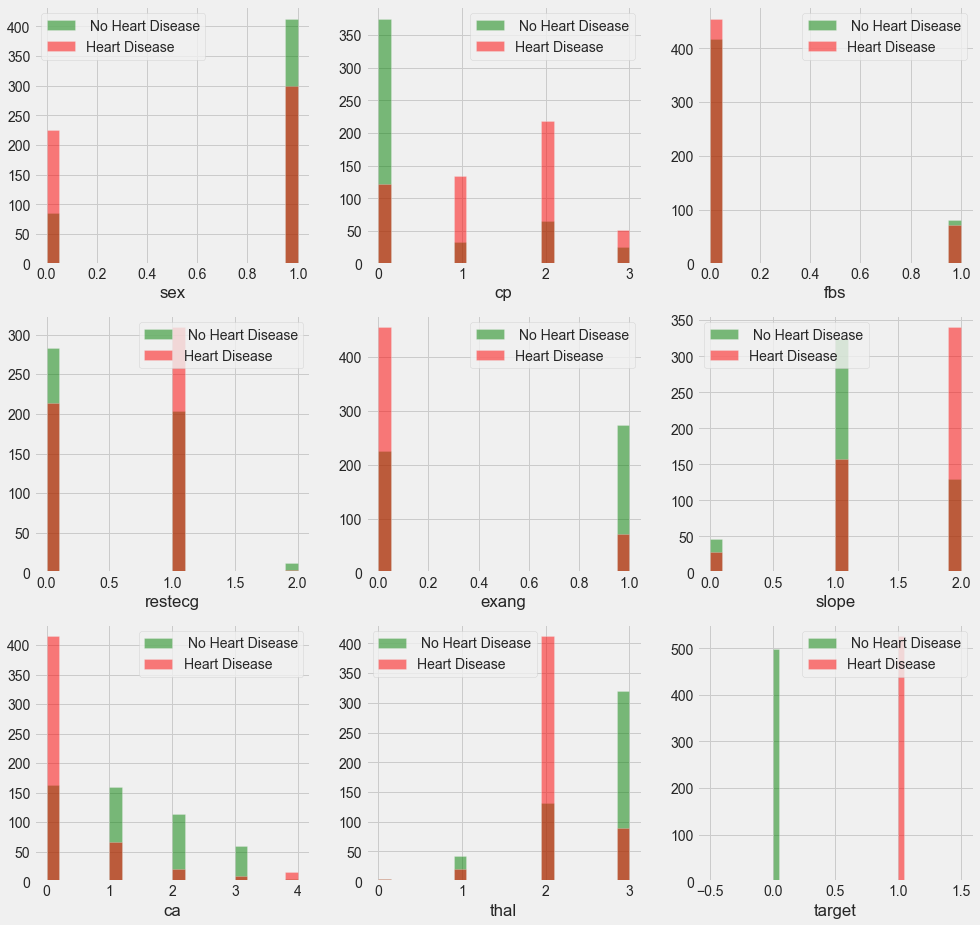

In [10]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(small_val, 1):
    plt.subplot(3, 3, i)
    data_hd[data_hd["target"] == 0][column].hist(bins=20, color='green', label=' No Heart Disease', alpha=0.5)
    data_hd[data_hd["target"] == 1][column].hist(bins=20, color='red', label='Heart Disease', alpha=0.5)
    plt.legend()
    plt.xlabel(column)

### Notes :
>- cp :orang dengan cp 1,2, 3 lebih rentan menderita heart disease dibandingakan dengan orang yg cp 0
>- restecg : orang dengan tipe 1 lebih rentan menderita heart disease
>- exang :orang dengan tipe 0 lebih rentan menderita heart disease dibandingkan dengan tipe 1
>- slope : orang dengan tipe 2 lebih rentan menderita heart disease dibandingkan tipe 0 dan 1
>- ca : orang dengan tipe 0 sangat rentan menderita heart disease
>- thal : orang dengan tipe 2 sangat rentan menderita heart disease 

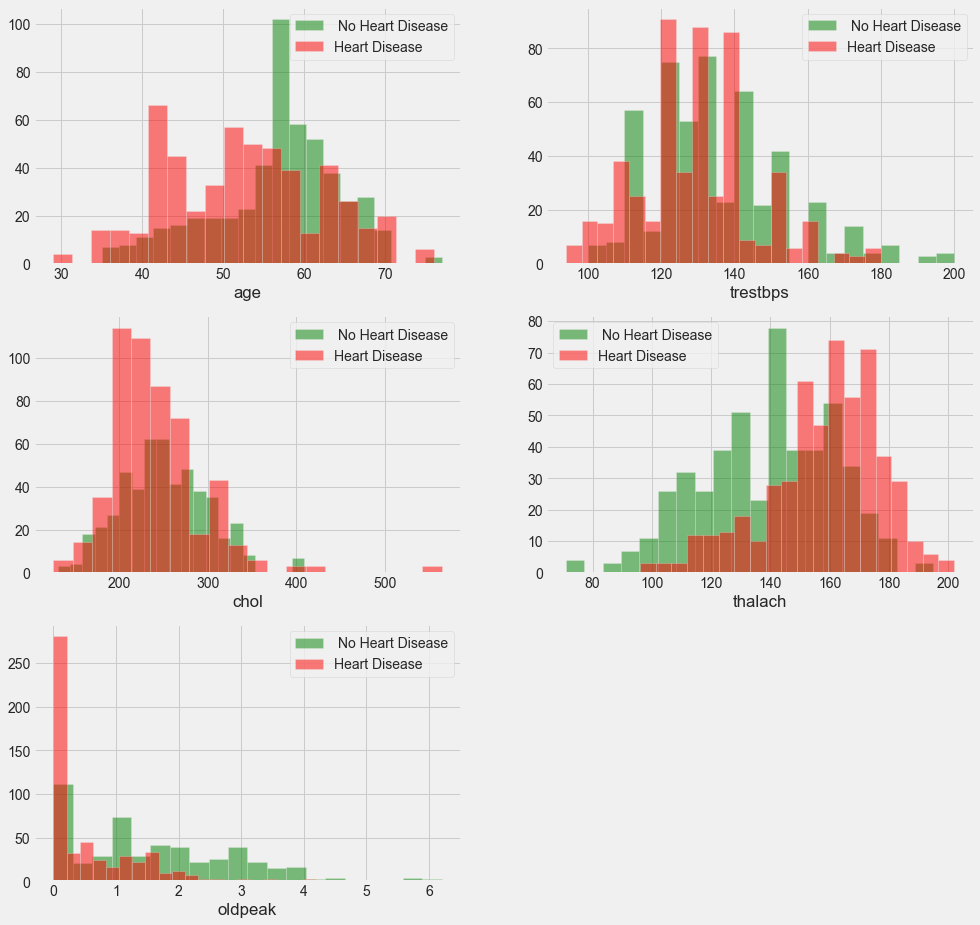

In [11]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(long_val, 1):
    plt.subplot(3, 2, i)
    data_hd[data_hd["target"] == 0][column].hist(bins=20, color='green', label=' No Heart Disease', alpha=0.5)
    data_hd[data_hd["target"] == 1][column].hist(bins=20, color='red', label='Heart Disease', alpha=0.5)
    plt.legend()
    plt.xlabel(column)

### Notes :
>- Age : Orang dengan umur 40an sampai 50an paling rentan menderita heart disease
>- trestbps : tekanan darah 120-140 akan lebih rentan mengalami heart disease
>- chol : koleterol diatas 200 akan lebih rentan mengalami heart disease
>- thalach : orang dengan thalach di atas 150 lebih rentan menderita heart disease
>- oldpeak :tipe 1 paling rentan menderita heart disease

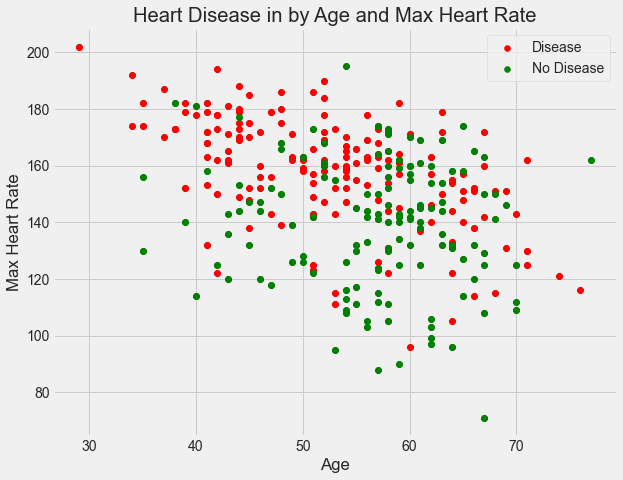

In [12]:
plt.figure(figsize=(9, 7))
plt.scatter(data_hd.age[data_hd.target==1],
            data_hd.thalach[data_hd.target==1],
            c="red")
plt.scatter(data_hd.age[data_hd.target==0],
            data_hd.thalach[data_hd.target==0],
            c="green")

plt.title("Heart Disease in by Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

In [13]:
data_hd.drop("target", axis=1).corrwith(data_hd.target).hvplot.barh(
    width=700, 
    height=400, 
    title="Correlation between Heart Disease and Features", 
    ylabel="Correlation", 
    xlabel="Features",
)

:Bars   [index]   (0)

### Notes
>- fbs memiliki korelasi yang sangat kecil dengan variabel target
>- variabel yang lainnya memiliki korelasi yg signifikan dengan variabel target 

In [14]:
data_hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.00,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.10,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.60,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.00,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.90,1,3,2,0


In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
stsc = StandardScaler()
col_to_scale = ["age", "trestbps", "chol", "thalach", "oldpeak"]
data_hd[col_to_scale] = stsc.fit_transform(data_hd[col_to_scale])
data_hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.27,1,0,-0.38,-0.66,0,1,0.82,0,-0.06,2,2,3,0
1,-0.16,1,0,0.48,-0.83,1,0,0.26,1,1.73,0,0,3,0
2,1.72,1,0,0.76,-1.40,0,1,-1.05,1,1.30,0,0,3,0
3,0.72,1,0,0.94,-0.83,0,1,0.52,0,-0.91,2,1,3,0
4,0.83,0,0,0.36,0.93,1,1,-1.87,0,0.71,1,3,2,0


In [26]:
fitur = data_hd.drop(["target"], axis = 1)
target = data_hd["target"]
print (fitur, fitur.shape)

       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0    -0.27    1   0     -0.38 -0.66    0        1     0.82      0    -0.06   
1    -0.16    1   0      0.48 -0.83    1        0     0.26      1     1.73   
2     1.72    1   0      0.76 -1.40    0        1    -1.05      1     1.30   
3     0.72    1   0      0.94 -0.83    0        1     0.52      0    -0.91   
4     0.83    0   0      0.36  0.93    1        1    -1.87      0     0.71   
...    ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020  0.50    1   1      0.48 -0.48    0        1     0.65      1    -0.91   
1021  0.61    1   0     -0.38  0.23    0        0    -0.35      1     1.47   
1022 -0.82    1   0     -1.23  0.56    0        0    -1.35      1    -0.06   
1023 -0.49    0   0     -1.23  0.16    0        0     0.43      0    -0.91   
1024 -0.05    1   0     -0.66 -1.12    0        1    -1.57      0     0.28   

      slope  ca  thal  
0         2   2     3  
1         0   0

## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr = LogisticRegression(solver = "newton-cg")
lr.fit(fitur, target)
print(classification_report(target, lr.predict(fitur)))
print(confusion_matrix(target, lr.predict(fitur)))

              precision    recall  f1-score   support

           0       0.90      0.80      0.84       499
           1       0.83      0.92      0.87       526

    accuracy                           0.86      1025
   macro avg       0.86      0.86      0.86      1025
weighted avg       0.86      0.86      0.86      1025

[[397 102]
 [ 44 482]]


## K-Nearest Neighbours Classifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(fitur, target) 
print(classification_report(target, knn.predict(fitur)))
print(confusion_matrix(target, knn.predict(fitur)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       499
           1       1.00      1.00      1.00       526

    accuracy                           1.00      1025
   macro avg       1.00      1.00      1.00      1025
weighted avg       1.00      1.00      1.00      1025

[[499   0]
 [  0 526]]


## Support Vector machine

In [19]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(fitur, target) 
print(classification_report(target, svm.predict(fitur)))
print(confusion_matrix(target, svm.predict(fitur)))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       499
           1       0.90      0.95      0.92       526

    accuracy                           0.92      1025
   macro avg       0.92      0.92      0.92      1025
weighted avg       0.92      0.92      0.92      1025

[[443  56]
 [ 27 499]]


## Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(fitur, target)
print(classification_report(target, tree.predict(fitur)))
print(confusion_matrix(target, tree.predict(fitur)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       499
           1       1.00      1.00      1.00       526

    accuracy                           1.00      1025
   macro avg       1.00      1.00      1.00      1025
weighted avg       1.00      1.00      1.00      1025

[[499   0]
 [  0 526]]


## Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(fitur, target)
print(classification_report(target, rf.predict(fitur)))
print(confusion_matrix(target, rf.predict(fitur)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       499
           1       1.00      1.00      1.00       526

    accuracy                           1.00      1025
   macro avg       1.00      1.00      1.00      1025
weighted avg       1.00      1.00      1.00      1025

[[499   0]
 [  0 526]]


## Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(fitur, target)
print(classification_report(target, nb.predict(fitur)))
print(confusion_matrix(target, nb.predict(fitur)))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       499
           1       0.81      0.87      0.84       526

    accuracy                           0.83      1025
   macro avg       0.83      0.83      0.83      1025
weighted avg       0.83      0.83      0.83      1025

[[395 104]
 [ 70 456]]


### Notes
berdasarkan nilai accuracy , algoritma yang paling sesuai adalah K-nearest neighbors, Decision tree dan Random Forest karena nilai accuracy nya 100 %